# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

In [3]:
df_raw = pd.read_csv('./data/zillow_data.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
df_raw.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 2: Data Preprocessing

In [14]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True).dt.to_period('M')
    melted = melted.dropna(subset=['value'])
    return melted

In [20]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='Date', value_name='Median-Price')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True).dt.to_period('M')
    melted = melted.dropna(subset=['Median-Price'])
    return melted

In [21]:
df = melt_data(df_raw)
df.info()

C:\Users\raxmo\AppData\Local\Temp\ipykernel_2560\254036374.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True).dt.to_period('M')


<class 'pandas.core.frame.DataFrame'>
Index: 3744704 entries, 0 to 3901594
Data columns (total 9 columns):
 #   Column        Dtype    
---  ------        -----    
 0   RegionName    int64    
 1   RegionID      int64    
 2   SizeRank      int64    
 3   City          object   
 4   State         object   
 5   Metro         object   
 6   CountyName    object   
 7   Date          period[M]
 8   Median-Price  float64  
dtypes: float64(1), int64(3), object(4), period[M](1)
memory usage: 285.7+ MB


In [22]:
df.head()

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,Date,Median-Price
0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,1996-04,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04,77300.0


In [23]:
new_york = df[(df['Metro'] == 'New York') & (df['State'] == 'NY')]
new_york.drop(columns = ['Metro', 'RegionID', 'State'], inplace=True)
new_york.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107557 entries, 6 to 3901492
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype    
---  ------        --------------   -----    
 0   RegionName    107557 non-null  int64    
 1   SizeRank      107557 non-null  int64    
 2   City          107557 non-null  object   
 3   CountyName    107557 non-null  object   
 4   Date          107557 non-null  period[M]
 5   Median-Price  107557 non-null  float64  
dtypes: float64(1), int64(2), object(2), period[M](1)
memory usage: 5.7+ MB


C:\Users\raxmo\AppData\Local\Temp\ipykernel_2560\3157334061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_york.drop(columns = ['Metro', 'RegionID', 'State'], inplace=True)


In [31]:
new_york.head()

,RegionName,SizeRank,City,CountyName,Date,Median-Price
6,10467,7,New York,Bronx,1996-04,152900.0
10,11226,11,New York,Kings,1996-04,162000.0
12,11375,13,New York,Queens,1996-04,252400.0
13,11235,14,New York,Kings,1996-04,190500.0
21,10128,22,New York,New York,1996-04,3676700.0


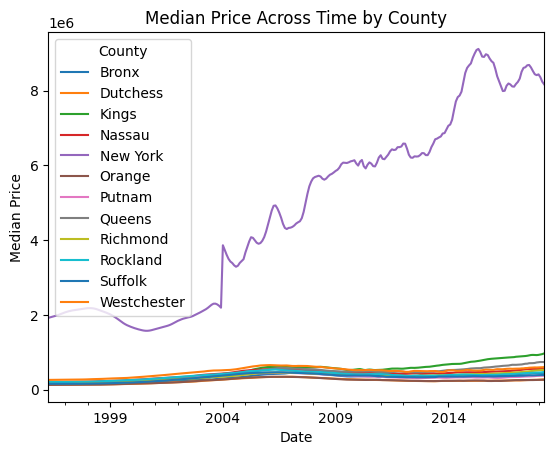

In [27]:

grouped_median_prices = new_york.groupby(['CountyName', 'Date'])['Median-Price'].median().unstack(level=0)

grouped_median_prices.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.title('Median Price Across Time by County')
plt.legend(title='County')
plt.show()

In [32]:
new_york['Median-Price'].value_counts()

Median-Price
254500.0     43
297600.0     40
337900.0     39
356500.0     39
237000.0     38
             ..
1286200.0     1
5685900.0     1
5723500.0     1
1590900.0     1
3467800.0     1
Name: count, Length: 12989, dtype: int64

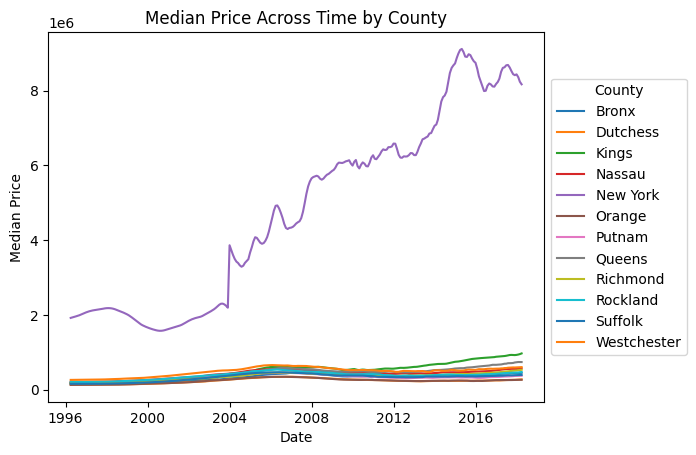

In [30]:
fig, ax = plt.subplots()

for county, county_data in new_york.groupby('CountyName'):
    county_median_prices = county_data.groupby('Date')['Median-Price'].median()
    ax.plot(county_median_prices.index.to_timestamp(), county_median_prices.values, label=county)

ax.set_xlabel('Date')
ax.set_ylabel('Median Price')
ax.set_title('Median Price Across Time by County')
ax.legend(title='County', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()